In [2]:
import sklearn
import matplotlib.pyplot as plt
import tensorflow
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
import tensorflow as tf
from sklearn import model_selection
from sklearn.metrics import r2_score
import glob
import os
import gc
from joblib import Parallel, delayed

C:\Users\akram\AppData\Roaming\Python\Python310\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [3]:
train_ = pd.read_csv('C:/Users/akram/Downloads/AFP_Data_train.csv')
b = train_[["id","company_id", "date", "status", "deal_type"]]
train_ = train_.drop(["id","company_id", "date", "status", "deal_type"],axis = 1)
b = b.apply(lambda col: pd.factorize(col, sort=True)[0])
train = pd.concat([train_, b], sort=False,axis=1)


test_ = pd.read_csv('C:/Users/akram/Downloads/AFP_Data_test.csv')
a = test_[['id',"company_id", "date", "status", "deal_type"]]
test_ = test_.drop(["id","company_id", "date", "status", "deal_type"],axis = 1)
a = a.apply(lambda col: pd.factorize(col, sort=True)[0])
test = pd.concat([test_, a], sort=False,axis=1)


In [4]:
# Split features and target
x = train.drop(['post_money_valuation'], axis = 1)
y = train[['post_money_valuation']]
x_test = test.drop(['post_money_valuation'], axis = 1)

### Scaling ####
scale_x = StandardScaler()
scale_y = StandardScaler()

X_train = scale_x.fit_transform(x)
y_train = scale_y.fit_transform(y).reshape(-1,1)
X_test = scale_x.fit_transform(x_test)

nrow= X_train.shape[1:]

In [5]:
### Model ###

model= Sequential()

model.add(Dense(100 , input_shape=(nrow), activation='relu', kernel_initializer='normal'))

model.add(Dense(75 , activation='relu', kernel_initializer='normal' ))

model.add(Dense(50 , activation='relu', kernel_initializer='normal' ))

model.add(Dense(25 , activation='relu', kernel_initializer='normal' ))

model.add(Dense(1,kernel_initializer='normal',activation='linear'))

epochs = 50
learning_rate = 0.3
decay_rate =learning_rate/epochs
adam = Adam(lr = learning_rate, decay= decay_rate)

model.compile(optimizer = 'adam', loss= 'mse')

model.fit(X_train,y_train,epochs=50,validation_split=0.3)

y_pred = model.predict(X_test)
y_pred = scale_y.inverse_transform(y_pred)
y_test = test['post_money_valuation']
#rmspe = (np.sqrt(np.mean(np.square((y_train-y_pred)/y_train))))
#print(rmspe)

result = pd.DataFrame(y_pred,y_test)
print(result)
print(y_pred)
print(y_test)


C:\Users\akram\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
1097/1097 [==============================] - 7s 5ms/step - loss: 0.9421 - val_loss: 0.4043
Epoch 2/50
1097/1097 [==============================] - 2s 2ms/step - loss: 0.5410 - val_loss: 0.6148
Epoch 3/50
1097/1097 [==============================] - 3s 2ms/step - loss: 0.5593 - val_loss: 0.3728
Epoch 4/50
1097/1097 [==============================] - 2s 2ms/step - loss: 0.3985 - val_loss: 0.5069
Epoch 5/50
1097/1097 [==============================] - 2s 2ms/step - loss: 0.3864 - val_loss: 0.4781
Epoch 6/50
1097/1097 [==============================] - 2s 2ms/step - loss: 0.2684 - val_loss: 0.5481
Epoch 7/50
1097/1097 [==============================] - 2s 2ms/step - loss: 0.2896 - val_loss: 0.2731
Epoch 8/50
1097/1097 [==============================] - 2s 2ms/step - loss: 0.4235 - val_loss: 0.3378
Epoch 9/50
1097/1097 [==============================] - 5s 4ms/step - loss: 0.1993 - val_loss: 0.2892
Epoch 10/50
1097/1097 [==============================] - 5s 4ms/step - loss: 0.253

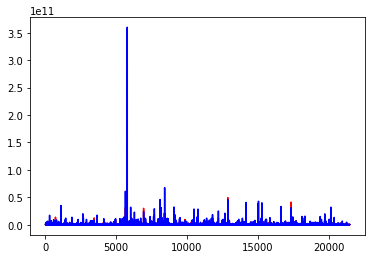

In [7]:
plt.plot(y_pred, color='r')
plt.plot(y_test, color='b')
plt.show()

C:\Users\akram\AppData\Local\Temp\ipykernel_9904\849166284.py:1: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(y_pred), color='r')


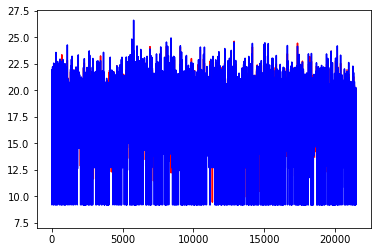

In [8]:
plt.plot(np.log(y_pred), color='r')
plt.plot(np.log(y_test), color='b')
plt.show()